In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [44]:
ped_predictions = []

# Extract current and next timestep data
t0, x0, y0 = 0, 0, 0
t1, x1, y1 = 1, 1, 1
t2, x2, y2 = 2, 2, 1

dt1 = 1
dt2 = 1


# Calculate velocity (vx, vy)
vx1 = (x1 - x0) / dt1
vy1 = (y1 - y0) / dt1

vx2 = (x2 - x1) / dt2
vy2 = (y2 - y1) / dt2

print(f"vx1: {vx1}, vy1: {vy1}")
print(f"vx2: {vx2}, vy2: {vy2}")


# Compute headings
theta1 = np.arctan2(y1 - y0, x1 - x0)
theta2 = np.arctan2(y2 - y1, x2 - x1)

print(np.degrees(theta1), np.degrees(theta2))


# Compute yaw rate and velocity
dtheta = theta2 - theta1
dtheta = np.arctan2(np.sin(dtheta), np.cos(dtheta))  # Normalize
print(np.degrees(dtheta))
omega = dtheta / dt2

v = np.sqrt(vx2**2 + vy2**2)
print(f"v: {v}")

### PREDICTION PART ###

## Step-by-step ph-step prediction   

    
if abs(omega) > 1e-5:  # Non-zero turn rate
    dt_s = dt2
    radius = v / omega

    print('rrrr', radius)

    x_base = x2
    y_base = y2
    theta_base = theta2

    print(f"x_base: {x_base}, y_base: {y_base}, theta_base: {np.degrees(theta_base)}")

    intermediate_points = []

    ph = 3

    for j in range(ph):

        print(f"j: {j}")

        theta_next = theta_base + omega * dt_s
        print(f"theta_next: {np.degrees(theta_next)}")

        x_next = x_base + radius * (np.sin(theta_next) - np.sin(theta_base))
        y_next = y_base - radius * (np.cos(theta_next) - np.cos(theta_base))

        intermediate_points.append([t2 + (j+1) * dt_s, x_next, y_next])

        print(intermediate_points)

        theta_base = theta_next
        x_base = x_next
        y_base = y_next
        print(f"theta_base: {np.degrees(theta_base)}, x_base: {x_base}, y_base: {y_base}")
    
#     x_next = x_base
#     y_next = y_base


#     dt = ph * dt2
#     print(intermediate_points)

# else:  # Straight-line motion
#     dt = ph * dt2
#     x_next = x2 + vx2 * dt
#     y_next = y2 + vy2 * dt  

# One-shot ph-step prediction
dt = ph * dt2

if abs(omega) > 1e-5:  # Non-zero turn rate
    radius = v / omega
    x_next = x2 + radius * (np.sin(theta2 + omega * dt) - np.sin(theta2))
    y_next = y2 - radius * (np.cos(theta2 + omega * dt) - np.cos(theta2))
else:  # Straight-line motion
    x_next = x2 + vx2 * dt
    y_next = y2 + vy2 * dt

print(x_next, y_next)

# # Predict next position assuming constant velocity
# t_next = t2 + dt  # Assuming uniform timestep

# # Store the prediction
# ped_predictions.append([t_next, ped_id, x_next, y_next])

# # Store predictions for this pedestrian
# predictions[ped_id] = ped_predictions

# p_x = []
# p_y = []
# # Print predictions for each pedestrian
# for ped_id, pred in predictions.items():
# # print(f"Predictions for pedestrian {ped_id}:")
# for p in pred:
#     # print(p)
#     p_x.append(p[2])
#     p_y.append(p[3])

# len(p_x)

vx1: 1.0, vy1: 1.0
vx2: 1.0, vy2: 0.0
45.0 0.0
-45.0
v: 1.0
rrrr -1.2732395447351628
x_base: 2, y_base: 1, theta_base: 0.0
j: 0
theta_next: -45.0
[[3, np.float64(2.900316316157106), np.float64(0.6270767714219434)]]
theta_base: -45.0, x_base: 2.900316316157106, y_base: 0.6270767714219434
j: 1
theta_next: -90.0
[[3, np.float64(2.900316316157106), np.float64(0.6270767714219434)], [4, np.float64(3.2732395447351625), np.float64(-0.27323954473516265)]]
theta_base: -90.0, x_base: 3.2732395447351625, y_base: -0.27323954473516265
j: 2
theta_next: -135.0
[[3, np.float64(2.900316316157106), np.float64(0.6270767714219434)], [4, np.float64(3.2732395447351625), np.float64(-0.27323954473516265)], [5, np.float64(2.900316316157106), np.float64(-1.173555860892269)]]
theta_base: -135.0, x_base: 2.900316316157106, y_base: -1.173555860892269
2.900316316157106 -1.173555860892269


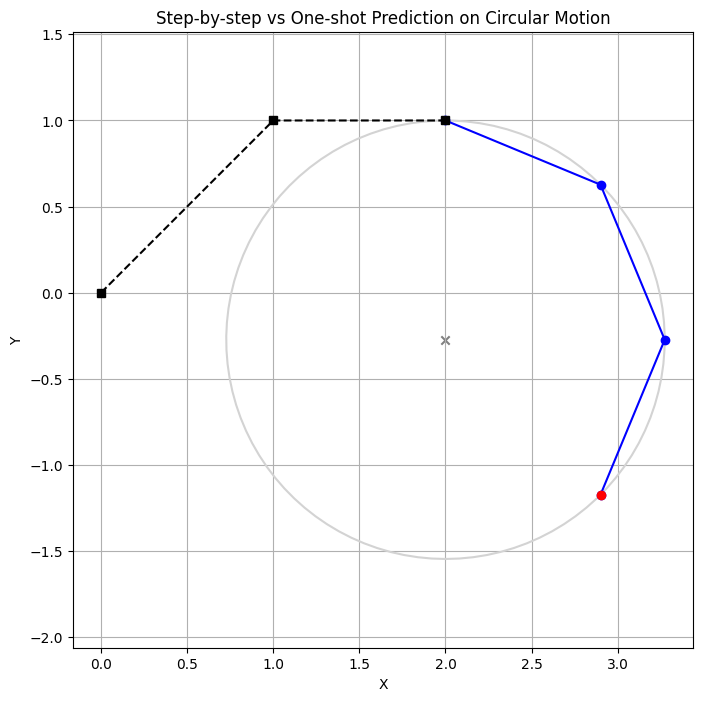

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Initial points
t0, x0, y0 = 0, 0, 0
t1, x1, y1 = 1, 1, 1
t2, x2, y2 = 2, 2, 1

dt1 = dt2 = 1

# Velocities
vx1 = (x1 - x0) / dt1
vy1 = (y1 - y0) / dt1

vx2 = (x2 - x1) / dt2
vy2 = (y2 - y1) / dt2

# Headings
theta1 = np.arctan2(y1 - y0, x1 - x0)
theta2 = np.arctan2(y2 - y1, x2 - x1)

# Yaw rate
dtheta = theta2 - theta1
dtheta = np.arctan2(np.sin(dtheta), np.cos(dtheta))
omega = dtheta / dt2

# Speed
v = np.sqrt(vx2**2 + vy2**2)

# Step-by-step prediction
dt_s = dt2
radius = v / omega
x_base, y_base = x2, y2
theta_base = theta2
ph = 3

intermediate_points = []

for j in range(ph):
    theta_next = theta_base + omega * dt_s
    x_next = x_base + radius * (np.sin(theta_next) - np.sin(theta_base))
    y_next = y_base - radius * (np.cos(theta_next) - np.cos(theta_base))
    intermediate_points.append((x_next, y_next))
    theta_base, x_base, y_base = theta_next, x_next, y_next

# One-shot prediction
dt = ph * dt2
x_final = x2 + radius * (np.sin(theta2 + omega * dt) - np.sin(theta2))
y_final = y2 - radius * (np.cos(theta2 + omega * dt) - np.cos(theta2))

# Circle center
cx = x2 - radius * np.sin(theta2)
cy = y2 + radius * np.cos(theta2)

# Plotting
# theta_vals = np.linspace(theta2, theta2 + omega * dt, 100)
theta_vals = np.linspace(-np.pi, np.pi, 100)
circle_x = cx + radius * np.sin(theta_vals)
circle_y = cy - radius * np.cos(theta_vals)

plt.figure(figsize=(8, 8))
plt.plot(circle_x, circle_y, 'lightgray', label="Circle Arc (True Path)")
plt.plot([x2] + [p[0] for p in intermediate_points], [y2] + [p[1] for p in intermediate_points], 'o-b', label="Step-by-Step Prediction")
plt.plot(x_final, y_final, 'ro', label="One-shot Prediction")
plt.plot([x0, x1, x2], [y0, y1, y2], 'ks--', label="Initial Points")

plt.scatter(cx, cy, color='gray', marker='x', label="Circle Center")
plt.axis("equal")
plt.grid(True)
# plt.legend()
plt.title("Step-by-step vs One-shot Prediction on Circular Motion")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


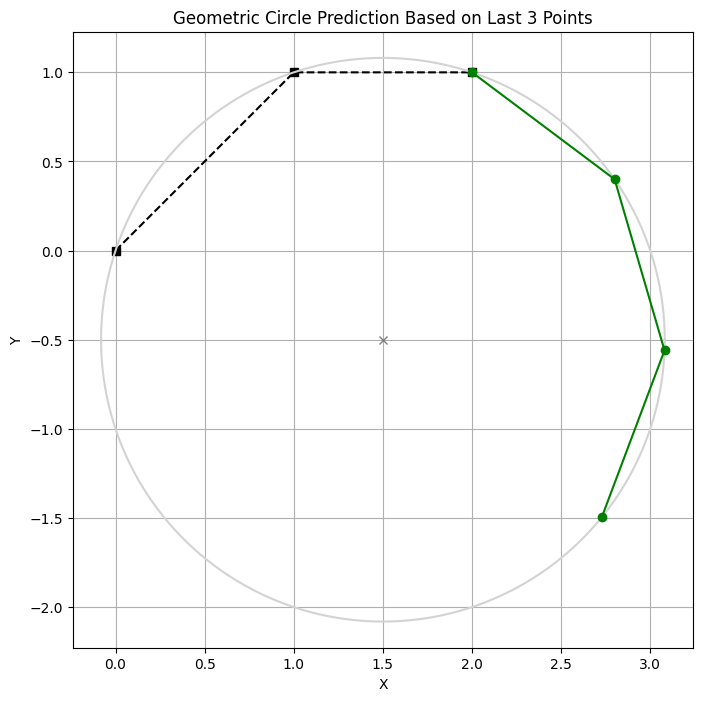

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Original three points
p0 = np.array([0, 0])
p1 = np.array([1, 1])
p2 = np.array([2, 1])

# Function to compute circle center from three points
def circle_from_points(a, b, c):
    # Midpoints
    mid_ab = (a + b) / 2
    mid_bc = (b + c) / 2

    # Slopes
    d_ab = b - a
    d_bc = c - b

    # Perpendicular directions
    perp_ab = np.array([-d_ab[1], d_ab[0]])
    perp_bc = np.array([-d_bc[1], d_bc[0]])

    # Solve for intersection point (center of circle)
    A = np.array([perp_ab, -perp_bc]).T
    b_vec = mid_bc - mid_ab
    t = np.linalg.solve(A, b_vec)

    center = mid_ab + t[0] * perp_ab
    radius = np.linalg.norm(center - a)
    return center, radius

# Compute circle center and radius
center, radius = circle_from_points(p0, p1, p2)

# Angle from center to p2
theta2 = np.arctan2(p2[1] - center[1], p2[0] - center[0])

# Arc angle per step (angle between p1 and p2 relative to center)
theta1 = np.arctan2(p1[1] - center[1], p1[0] - center[0])
dtheta = theta2 - theta1
dtheta = np.arctan2(np.sin(dtheta), np.cos(dtheta))  # Normalize angle

# Predict next 3 positions by rotating around the center
ph = 3
predicted_geom = []
for i in range(1, ph + 1):
    angle = theta2 + i * dtheta
    x = center[0] + radius * np.cos(angle)
    y = center[1] + radius * np.sin(angle)
    predicted_geom.append((x, y))

# Plot the original 3 points
plt.figure(figsize=(8, 8))
plt.plot([p0[0], p1[0], p2[0]], [p0[1], p1[1], p2[1]], 'ks--', label="Initial Points")

# Draw full circle
theta_vals = np.linspace(0, 2 * np.pi, 200)
circle_x = center[0] + radius * np.cos(theta_vals)
circle_y = center[1] + radius * np.sin(theta_vals)
plt.plot(circle_x, circle_y, 'lightgray', label="Fitted Circle")

# Plot geometric predictions
xg, yg = zip(*predicted_geom)
plt.plot([p2[0]] + list(xg), [p2[1]] + list(yg), 'og-', label="Geometric Circle Prediction")

# Mark center
plt.plot(center[0], center[1], 'x', color='gray', label="Circle Center")

plt.axis("equal")
plt.grid(True)
# plt.legend()
plt.title("Geometric Circle Prediction Based on Last 3 Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


-153.31134690159269
-29.456320773298575
-91.38383383744562
-153.31134690159269


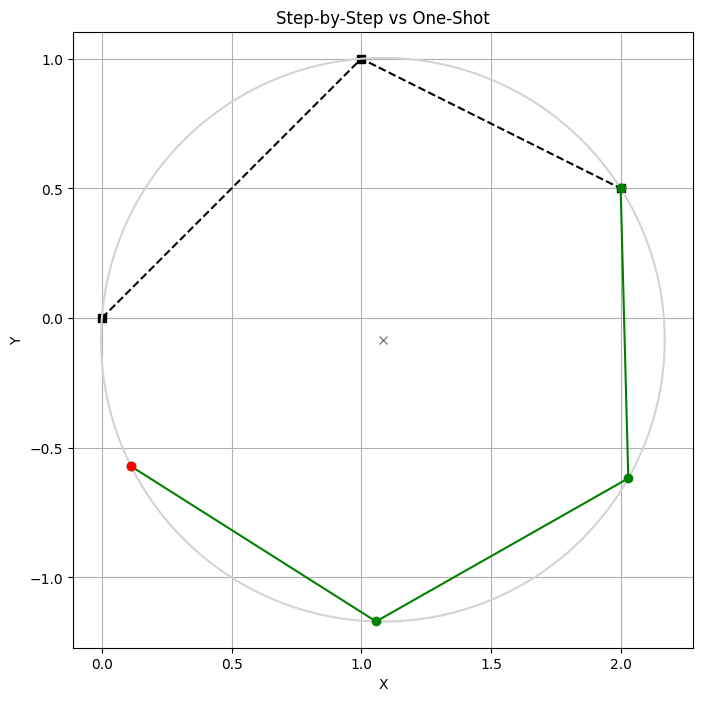

In [76]:
# One-shot prediction (rotate by 3 * dtheta from p2)
angle_oneshot = theta2 + ph * dtheta
x_oneshot = center[0] + radius * np.cos(angle_oneshot)
y_oneshot = center[1] + radius * np.sin(angle_oneshot)

print(np.degrees(angle_oneshot))
# Step-by-step prediction (already computed earlier)
step_by_step_geom = [p2]
for i in range(1, ph + 1):
    angle = theta2 + i * dtheta
    x = center[0] + radius * np.cos(angle)
    y = center[1] + radius * np.sin(angle)
    print(np.degrees(angle))
    step_by_step_geom.append((x, y))

# Plotting
plt.figure(figsize=(8, 8))
plt.plot([p0[0], p1[0], p2[0]], [p0[1], p1[1], p2[1]], 'ks--', label="Initial Points")

# Draw full circle
theta_vals = np.linspace(0, 2 * np.pi, 200)
circle_x = center[0] + radius * np.cos(theta_vals)
circle_y = center[1] + radius * np.sin(theta_vals)
plt.plot(circle_x, circle_y, 'lightgray', label="Fitted Circle")

# Step-by-step prediction
xg, yg = zip(*step_by_step_geom)
plt.plot(xg, yg, 'og-', label="Step-by-Step Prediction")

# One-shot prediction
plt.plot(x_oneshot, y_oneshot, 'ro', label="One-shot Prediction")

# Mark center
plt.plot(center[0], center[1], 'x', color='gray', label="Circle Center")

plt.axis("equal")
plt.grid(True)
# plt.legend()
plt.title("Step-by-Step vs One-Shot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
